In [1]:
pwd

'/Users/alokprasad/Quantum/miniconda3/envs/q1/bin'

In [2]:
import qiskit
print(qiskit.__version__)


1.0.2


In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
#
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum", token="66dc1570e14fc215832aa776f938f139778dee30741bb3b61dd598041c0611f4eaa56f347f02c0d0735ffefc97b0d6ac6f5762012b26af258e5452df805132e5")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

### A1. Not Gate |0> to |1>

Matplotlib created a temporary cache directory at /var/folders/p9/tlg47fp57vd48nxtrnmck7br0000gn/T/matplotlib-hwf6821m because the default path (/Users/alokprasad/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


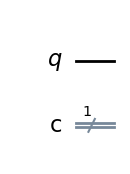

In [4]:
# Let's do an X-gate on a |0> qubit
# Initiating the qubit in |0> and visualizing it
qc = QuantumCircuit(1,1)
qc.draw('mpl')

In [5]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [6]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[1.+0.j 0.+0.j]

 Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


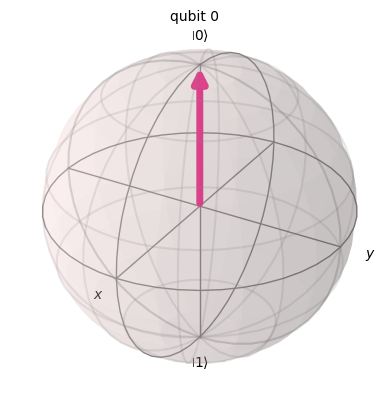

In [7]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

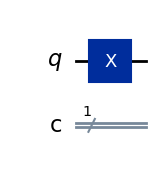

In [8]:
qc.x(0)
qc.draw('mpl')

In [9]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [10]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.+0.j 1.+0.j]

 Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


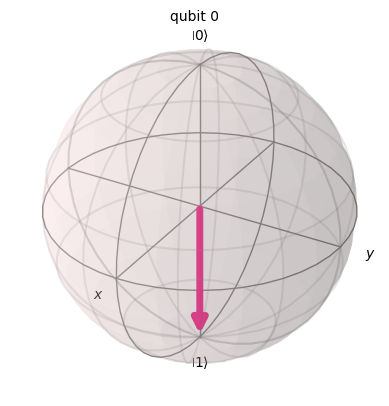

In [11]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [12]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [13]:
# Use Aer's qasm_simulator

backend = Aer.get_backend('qasm_simulator')

qc.measure([0], [0])
print(qc)

from qiskit import QuantumCircuit
from qiskit_aer import Aer

result = backend.run(qc, shots=10).result()

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 



Total count for 0 and 1 are: {'1': 10}


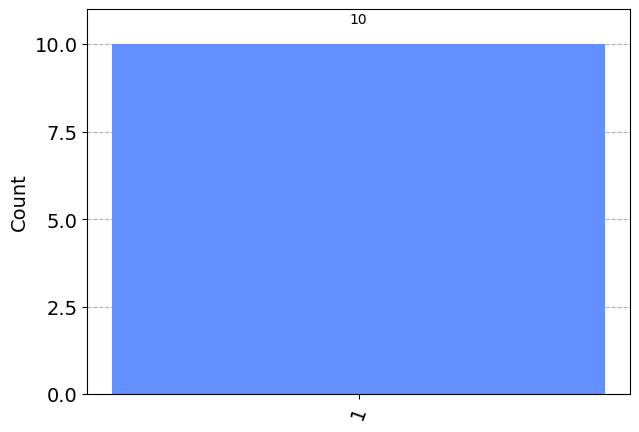

In [14]:
# Return counts
counts = result.get_counts(qc)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(qc)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END

A2 Exercise

### Ercise: Prepare Single qubit quantum circuit in |1> and then apply Not Gate

Measure the circuit and then repeat above visualization techniques

### B1. Not Gate |+> to |?>

In [15]:
import numpy as np
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
circuit.draw()

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

In [16]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(circuit)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [17]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.70710678+0.j 0.70710678+0.j]

 Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


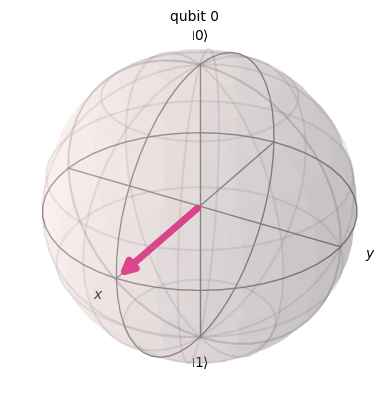

In [18]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister #https://chat.openai.com/c/6eb208a5-650d-48c3-abd7-48423c4e440c

cr = ClassicalRegister(1)

circuit.add_register(cr) # Adding classical register to the already initialized quantum circuit

circuit.draw()

┌─────────────────────────────┐
   q: ┤ Initialize(0.70711,0.70711) ├
      └─────────────────────────────┘
c0: 1/═══════════════════════════════

In [20]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [21]:
# Use Aer's qasm_simulator

backend = Aer.get_backend('qasm_simulator')

circuit.measure([0], [0])
print(qc)

from qiskit import QuantumCircuit
from qiskit_aer import Aer

result = backend.run(circuit, shots=10).result()

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 



Total count for 0 and 1 are: {'1': 7, '0': 3}


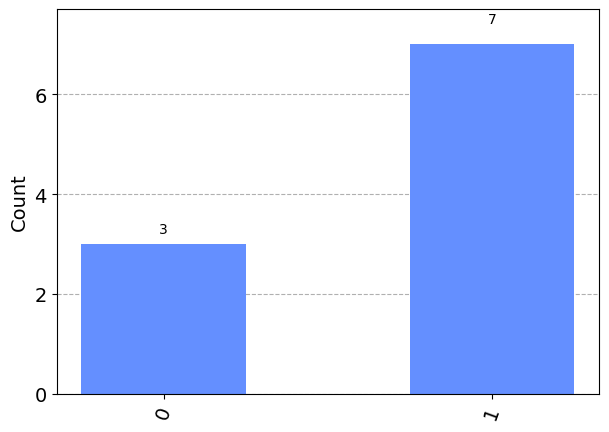

In [22]:
# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END


Total count for 0 and 1 are: {'0': 49, '1': 51}


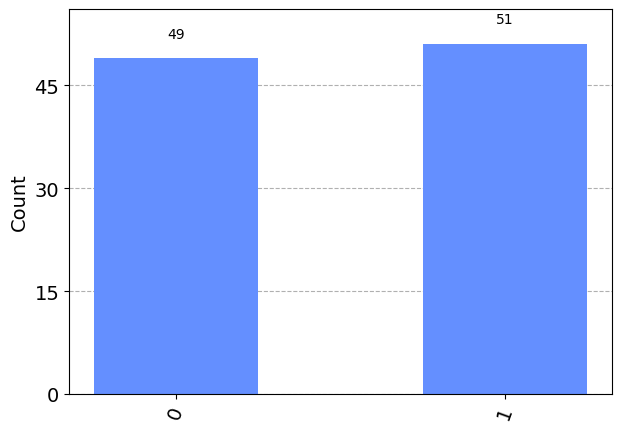

In [23]:
# Return counts

result = backend.run(circuit, shots=100).result()

counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END


Total count for 0 and 1 are: {'0': 492, '1': 508}


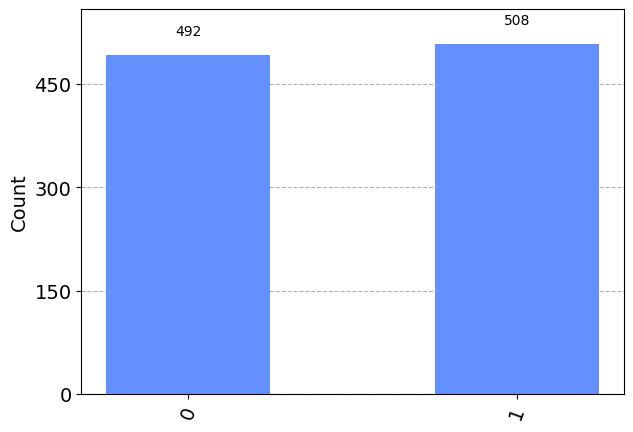

In [24]:
# Return counts

result = backend.run(circuit, shots=1000).result()

counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END

#### The result of Not gate on |+> is |+>

B2 Exercise: Not Gate |-> to |?>
### The Not gate acting on |+> and |-> state leaves the state unchanged, why?

### C1. Not gate on |+i> to |?>

In [25]:
import numpy as np
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2) ,  1j/np.sqrt(2)])
circuit.draw()

┌──────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711j) ├
   └──────────────────────────────┘

In [26]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(circuit)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [27]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.70710678+0.j         0.        +0.70710678j]

 Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


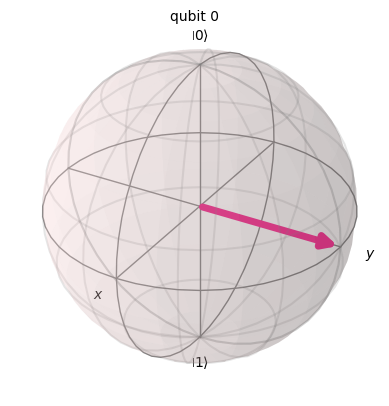

In [28]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [29]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister #https://chat.openai.com/c/6eb208a5-650d-48c3-abd7-48423c4e440c

cr = ClassicalRegister(1)

circuit.add_register(cr) # Adding classical register to the already initialized quantum circuit

circuit.draw()

┌──────────────────────────────┐
   q: ┤ Initialize(0.70711,0.70711j) ├
      └──────────────────────────────┘
c1: 1/════════════════════════════════

In [30]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [31]:
# Use Aer's qasm_simulator

backend = Aer.get_backend('qasm_simulator')

circuit.measure([0], [0])
print(circuit)

from qiskit import QuantumCircuit
from qiskit_aer import Aer

result = backend.run(circuit, shots=10).result()

      ┌──────────────────────────────┐┌─┐
   q: ┤ Initialize(0.70711,0.70711j) ├┤M├
      └──────────────────────────────┘└╥┘
c1: 1/═════════════════════════════════╩═
                                       0 



Total count for 0 and 1 are: {'0': 5, '1': 5}


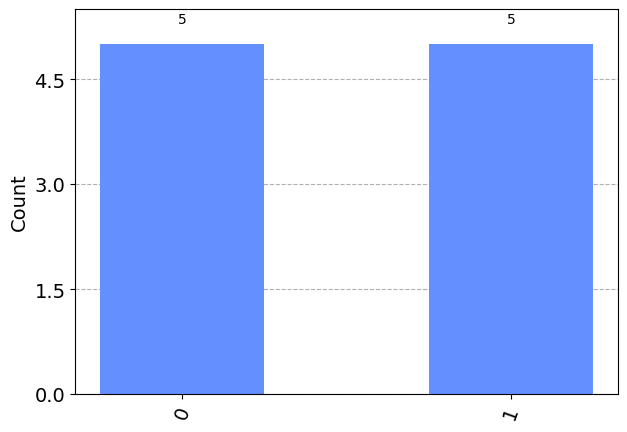

In [32]:
# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END


Total count for 0 and 1 are: {'1': 44, '0': 56}


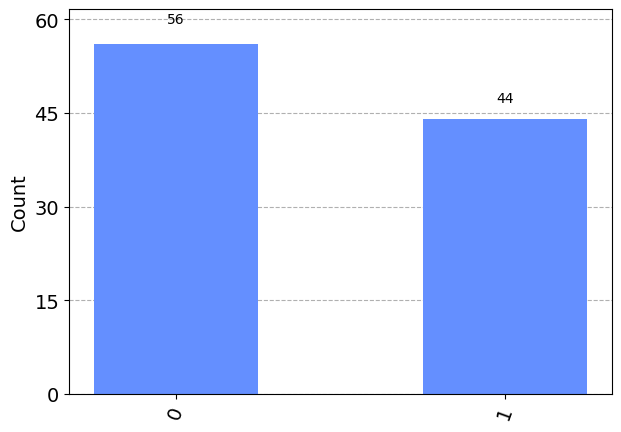

In [33]:
# Return counts
result = backend.run(circuit, shots=100).result()

counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END


Total count for 0 and 1 are: {'0': 504, '1': 496}


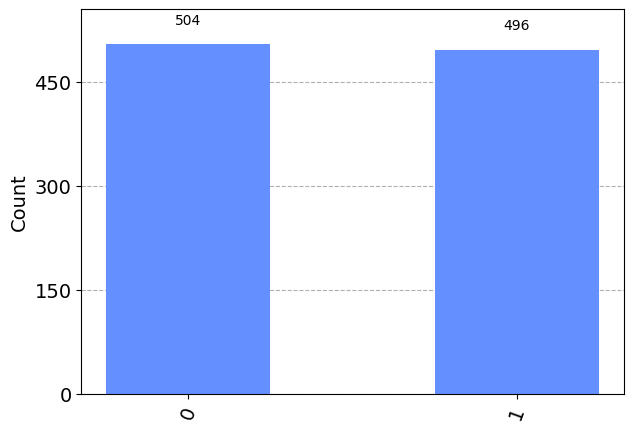

In [34]:
# Return counts
result = backend.run(circuit, shots=1000).result()

counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)

# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END